In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
import yfinance as yf


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Import Data
df = yf.download("WFC",period = "10y")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-18,32.330002,32.730000,32.200001,32.459999,24.372732,20933700
2012-06-19,32.709999,33.220001,32.500000,32.959999,24.748165,30620000
2012-06-20,33.020000,33.160000,32.320000,32.810001,24.635530,29557200
2012-06-21,32.910000,33.139999,32.270000,32.340000,24.282627,31928700
2012-06-22,32.669998,33.090000,32.549999,32.810001,24.635530,34799300


In [3]:
# Create Dataframe for Adjusted Close prices

df_adj = df[['Adj Close']].copy()
df_adj

,Adj Close
Date,
2012-06-18,24.372732
2012-06-19,24.748165
2012-06-20,24.635530
2012-06-21,24.282627
2012-06-22,24.635530
...,...
2022-06-13,38.990002
2022-06-14,37.430000
2022-06-15,38.169998


In [4]:
# Fit and print a summary of the best model, which is ARIMA (4,1,4), which we got in ARIMA Analysis

best_model = ARIMA(df_adj, order=(4, 1, 4)).fit(disp=0)
print(best_model.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 2517
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2591.782
Method:                       css-mle   S.D. of innovations              0.677
Date:                Sat, 18 Jun 2022   AIC                           5203.564
Time:                        14:30:55   BIC                           5261.872
Sample:                             1   HQIC                          5224.725
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0056      0.013      0.421      0.673      -0.021       0.032
ar.L1.D.Adj Close    -0.3395      0.060     -5.663      0.000      -0.457      -0.222
ar.L2.D.Adj Close     0.

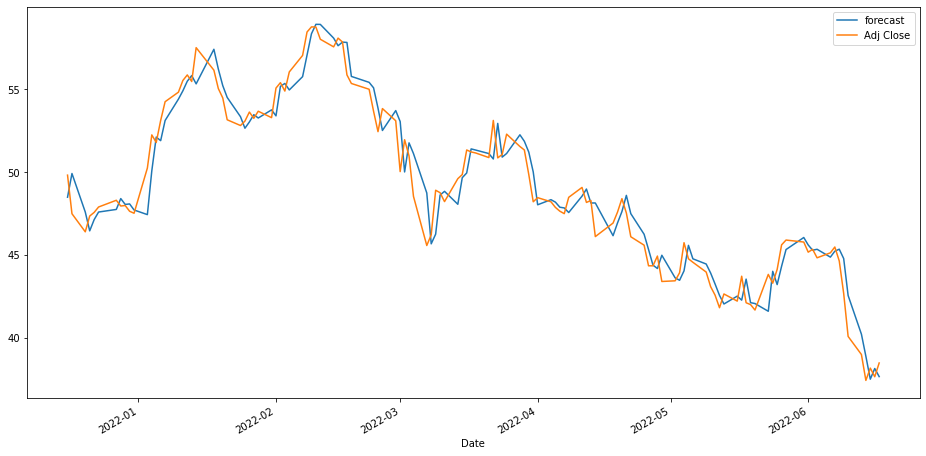

In [5]:
# Plot Actual vs predicted price for last 6 months of 2022

plt.rc("figure", figsize=(16,8))

best_model.plot_predict(
      start=2391,
      end=2517,
      dynamic=False,
);

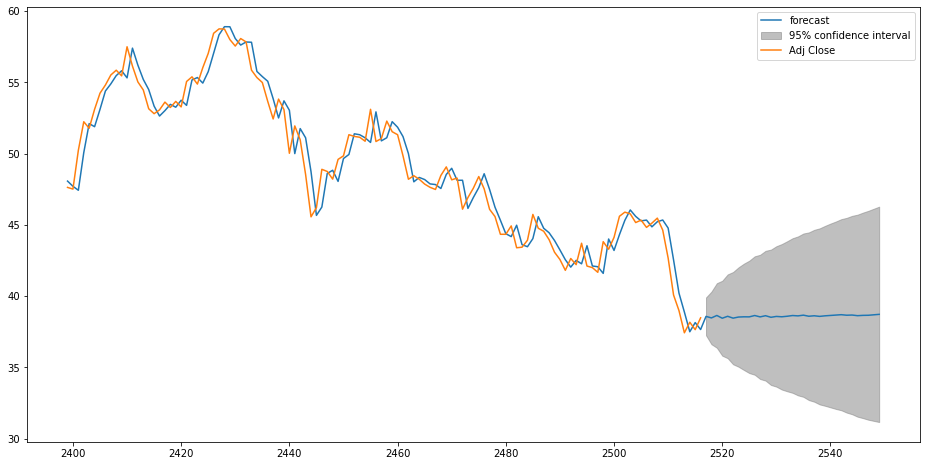

In [6]:
# Plot Actual vs predicted price extending 30 days into 2022

plt.rc("figure", figsize=(16,8))
best_model.plot_predict(
      start=2400,
      end=2550,
      dynamic=False,
);